In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Helper Functions:

def practice_prob(s, a, b):
    """Probability of practicing given skill s, and parameters a and b."""
    p = a + b*S # Linear practice function
    return p

def learn_skill(S, alpha=0.1, lc='sigmoid', S_max = 1):
    if lc=='sigmoid':
        S_next = S + alpha*S*(S_max - S) 
    elif lc== 'concave':
        S_next = S + alpha*(S_max - S) 

    return S_next


def forget_skill(S, retention=0.9):
    """
    Note: retention is related to forgetting rate beta as:
        retention = exp(-beta)
    One can use either forgetting rate beta or retention factor (0 < retention < 1). 
    Both are equivalent.
    """
    S_next = S*retention
    return S_next

## Run Simulation with Discrete RPS Model:

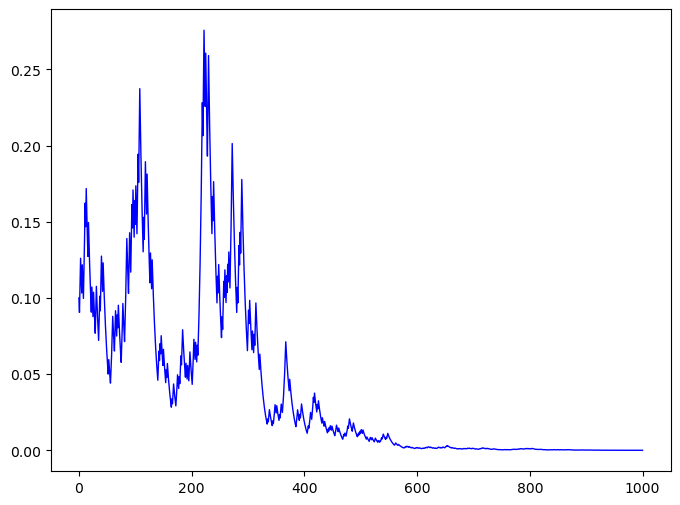

In [89]:
t_max = 1000 # now steps of time

# Initial Conditions:
s0 = 0.1 # initial skill
p0 = 0.1 # initial prob. of practice

# Individual Parameters:
a = 0.3 # min. practice prob.
b = 0.6 # success sensitivity
alpha = 0.2 # learning rate
beta = 0.1 # forgetting rate


# --- simulate one learner ----
t_list = np.arange(t_max+1)
s_list = [s0]
p_list = [p0]
prac_list = []

for t in range(t_max):
    s_ = s_list[-1]
    p_ = p_list[-1]

    # Did the learner practice?
    prac = np.random.binomial(n=1, p=p_) # 1 with prob p, 0 else
    prac_list.append(prac)    
    
    # Update skill
    if prac==1: # if learner practiced
        s_new = learn_skill(s_, alpha=alpha, lc='sigmoid', S_max = 1)
    else: # did not practice
        s_new = forget_skill(s_, retention=np.exp(-beta))
    s_list.append(s_new)

    # update prob. of practice:
    p_new = a + b*s_new
    p_list.append(p_new)
    
#----  end of sim ----


# Plotting results:
plt.figure(figsize=(8,6))
plt.plot(t_list, s_list, label='Skill (S)', color='blue', lw=1)
#plt.plot(t_list, p_list, label='Practice Probability (p)', color='orange', lw=3)
plt.show()


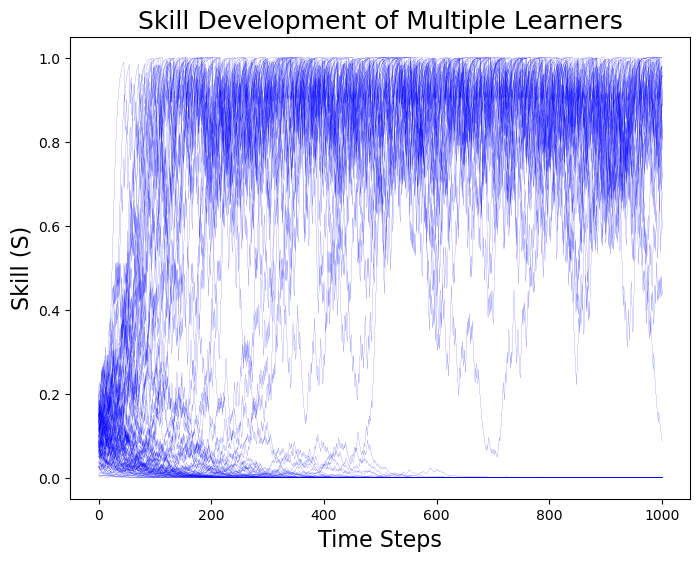

In [90]:
# simulate multiple learners
n_learners = 100
s0_list = np.random.uniform(0, 0.2, n_learners) # initial skill
p0_list = np.random.uniform(0, 0.2, n_learners) # initial prob. of practice

s_mat = np.zeros((n_learners, t_max+1))
p_mat = np.zeros((n_learners, t_max+1)) 
s_mat[:,0] = s0_list
p_mat[:,0] = p0_list
prac_mat = np.zeros((n_learners, t_max))

for i in range(n_learners):
    s_list = [s0_list[i]]
    p_list = [p0_list[i]]
    for t in range(t_max):
        s_ = s_list[-1]
        p_ = p_list[-1]

        # Did the learner practice?
        prac = np.random.binomial(n=1, p=p_) # 1 with prob p, 0 else
        prac_mat[i,t] = prac    

        # Update skill
        if prac==1: # if learner practiced
            s_new = learn_skill(s_, alpha=alpha, lc='sigmoid', S_max = 1)
        else: # did not practice
            s_new = forget_skill(s_, retention=np.exp(-beta))
        s_list.append(s_new)

        # update prob. of practice:
        p_new = a + b*s_new
        p_list.append(p_new)

    s_mat[i,:] = s_list
    p_mat[i,:] = p_list

#----  end of sim ----


# Plotting results:
plt.figure(figsize=(8,6))
for i in range(n_learners):
    plt.plot(t_list, s_mat[i,:], color='blue', alpha=1, lw=0.1)
    #plt.plot(t_list, p_list, label='Practice Probability (p)', color='orange', lw=3)
plt.xlabel('Time Steps', fontsize=16)
plt.ylabel('Skill (S)', fontsize=16)
plt.title('Skill Development of Multiple Learners', fontsize=18)
plt.show()

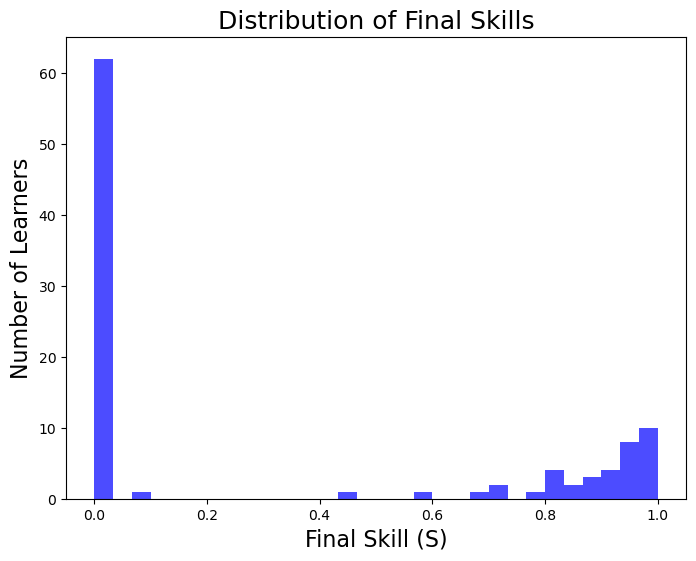

In [91]:
# Histogram of final skills:
plt.figure(figsize=(8,6))
plt.hist(s_mat[:,-1], bins=30, color='blue', alpha=0.7)
plt.xlabel('Final Skill (S)', fontsize=16)
plt.ylabel('Number of Learners', fontsize=16)
plt.title('Distribution of Final Skills', fontsize=18)
plt.show()